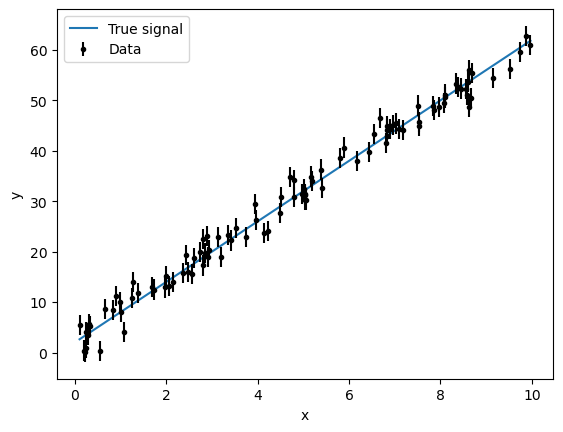

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

rng = np.random.default_rng(seed=3051)

def linear_model(p: np.ndarray[float], x: np.ndarray[float]) -> np.ndarray[float]:
    m, b = p
    return m * x + b

N = 100
m_true, b_true = 6, 2
p_true = np.array([m_true, b_true])
noise_level = 2

x = np.sort(rng.uniform(0, 10, size=N))
y_true = linear_model(p_true, x)

yerr = noise_level * np.ones_like(x)
y = y_true + yerr * rng.standard_normal(N)

plt.plot(x, y_true, label="True signal")
plt.errorbar(x,y,yerr=yerr,fmt='k.', label = "Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

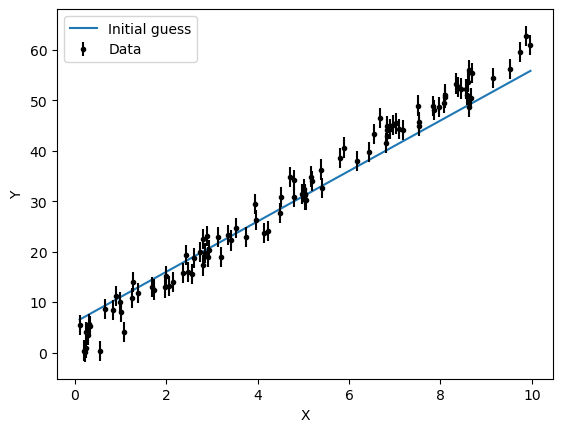

In [9]:
def chi2_fun(p: np.ndarray[float], x: np.ndarray[float], y: np.ndarray[float], yerr: np.ndarray[float]) -> float:
    y_mod = linear_model(p, x)
    return np.sum((y - y_mod) ** 2 / yerr**2)

p_guess = np.array([5, 6])

plt.plot(x, linear_model(p_guess, x), label="Initial guess")
plt.errorbar(x, y, yerr=yerr, fmt="k.", label="Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [11]:
opt_res = sp.optimize.minimize(chi2_fun, p_guess, args=(x,y,yerr))
opt_res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 104.78365720700101
        x: [ 5.908e+00  2.565e+00]
      nit: 3
      jac: [-1.907e-06  9.537e-07]
 hess_inv: [[ 2.420e-03 -1.141e-02]
            [-1.141e-02  7.380e-02]]
     nfev: 15
     njev: 5

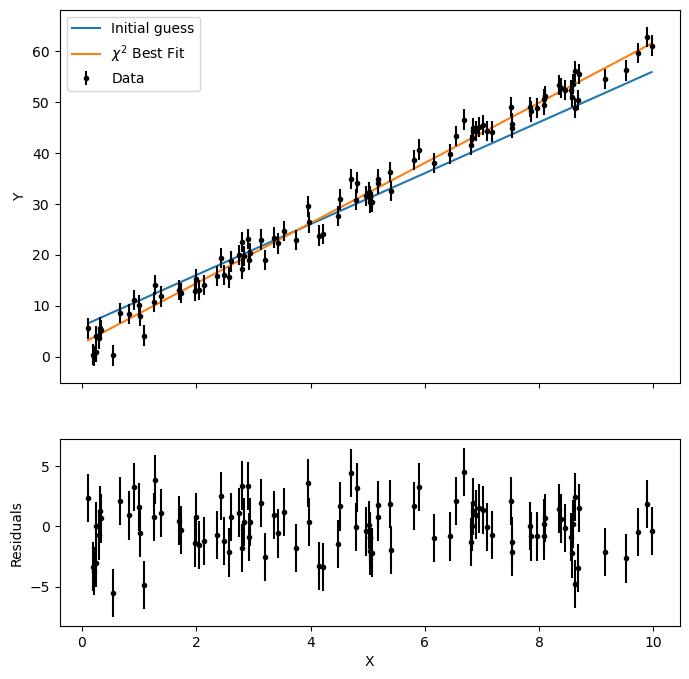

In [12]:
p_fit = opt_res.x
best_mod = linear_model(p_fit, x)
res = y - best_mod

fig, axes = plt.subplots(
    2, 1,
    figsize=(8, 8),
    sharex=True,  # utiliser le même axe des X pour le modèle et les résidus
    gridspec_kw={"height_ratios": (2, 1)}  # Panneau 2x plus haut pour le modèle qu pour les résidus
)
axes[0].plot(x, linear_model(p_guess, x), label="Initial guess")
axes[0].plot(x, best_mod, label="$\chi^2$ Best Fit")
axes[0].errorbar(x, y, yerr=yerr, fmt="k.", label="Data")
axes[0].set_ylabel("Y")
axes[0].legend()

axes[1].errorbar(x, res, yerr=yerr, fmt="k.")
axes[1].set_ylabel("Residuals")

axes[-1].set_xlabel("X")
plt.show()

In [13]:
np.savetxt("top_secret_data.txt", np.vstack([x, y, yerr]).T)
np.savetxt("top_secret_model.txt", best_mod)

In [14]:
class Dataset:
    pass

useless_data = Dataset()

dir(useless_data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [17]:
class Dataset:
    # __init__() est exécutée à la création d'un objet
    # On doit toujours inclure self comme premier argument
    def __init__(self, x: np.ndarray[float], y: np.ndarray[float], yerr: np.ndarray[float]):
        self.x = np.atleast_1d(x.copy())
        self.y = np.atleast_1d(y.copy())
        self.yerr = np.atleast_1d(yerr.copy())
        
        
x_fit = x.copy()
y_fit = y.copy()
yerr_fit = yerr.copy()
x = x_fit[:5]
y = y_fit[:5]
yerr = yerr_fit[:5]
# On doit donner les arguments de __init__() quand on crée notre Dataset
data_with_attributes = Dataset(x, y, yerr)

data_with_attributes.__dict__


print(data_with_attributes.x)
print(data_with_attributes.x.mean())
data_with_attributes.x = np.array([1, 2, 3, 4, 5])
print(data_with_attributes.x)
print(data_with_attributes)


[0.10575846 0.19868714 0.21424111 0.23929786 0.24396411]
0.20038973563728324
[1 2 3 4 5]


In [18]:
class Dataset:
    def __init__(self, x: np.ndarray[float], y: np.ndarray[float], yerr: np.ndarray[float]):
        self.x = np.atleast_1d(x.copy())
        self.y = np.atleast_1d(y.copy())
        self.yerr = np.atleast_1d(yerr.copy())

    def __repr__(self) -> str:
        return f"Object Dataset with:\n  X: {self.x}\n  Y: {self.y}\n  Y error: {self.yerr}\n"

    def sort_data(self) -> None:
        """Ordonner les données selon les valeurs de X"""
        sort_ind = np.argsort(self.x)
        self.yerr= self.yerr[sort_ind]
        self.y = self.y[sort_ind]
        self.x = self.x[sort_ind]
        
data = Dataset(np.array([8, 5, 4, 9, 3]), y, yerr)
print(data)

data.sort_data()
print(data)

data.name = "cooldata"
data.__dict__

Object Dataset with:
  X: [8 5 4 9 3]
  Y: [5.52954624 0.39709631 0.14469275 3.99709483 0.97437211]
  Y error: [2. 2. 2. 2. 2.]

Object Dataset with:
  X: [3 4 5 8 9]
  Y: [0.97437211 0.14469275 0.39709631 5.52954624 3.99709483]
  Y error: [2. 2. 2. 2. 2.]



{'x': array([3, 4, 5, 8, 9]),
 'y': array([0.97437211, 0.14469275, 0.39709631, 5.52954624, 3.99709483]),
 'yerr': array([2., 2., 2., 2., 2.]),
 'name': 'cooldata'}

In [19]:
class NormalizedDataset(Dataset):
    def __init__(self, x: np.ndarray[float], y: np.ndarray[float], yerr: np.ndarray[float]):
        # On applique le __init__ du parent ("super")
        super(NormalizedDataset, self).__init__(x, y, yerr)

        # On normalise directement
        # _y_orig permet de conserver les données originales.
        # Le "_" au début dénote un attribut "privé": on ne s'attend pas à ce que l'utilisateur s'en serve directement.
        self._y_orig = self.y.copy()
        self._yerr_orig = self.yerr.copy()

        self.yerr = self.yerr / self.y.mean()
        self.y = self.y / self.y.mean()

norm_data = NormalizedDataset(x, y, yerr)
norm_data

Object Dataset with:
  X: [0.10575846 0.19868714 0.21424111 0.23929786 0.24396411]
  Y: [2.50368798 0.1797987  0.06551451 1.80981908 0.44117973]
  Y error: [0.90556724 0.90556724 0.90556724 0.90556724 0.90556724]